In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
## Raw preprocessing
# results = pd.read_csv("results/eval_mmlu-13b_chat-verb1s.csv")
# results = results.rename(columns={'fuzzy_gpt-3.5-turbo-1106_acc': 'acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_acc': 'unc_acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_ece': 'ece'})
# results.loc[:, "method"] = "verb1s"
# results.to_csv("results/eval_mmlu-13b_chat-verb1s.csv", index=False)

In [16]:
print(verb_results)

[]


In [15]:
ct_results = pd.read_csv("results/eval_mmlu-13b_chat-ct-oe.csv")
ct_results = ct_results[ct_results.method == "ct"]

# ct_results = pd.read_csv("results/eval_mmlu-13b_chat-oe.csv")
# ct_results = ct_results[ct_results.method == "raw_13b_chat"]
# ct_results["dataset"] = ct_results["category"]

verb_results = []
for version in ["1s1g", "1s2g", "1s4g"]:
    _df = pd.read_csv(f"results/eval_mmlu-13b_chat-verb{version}.csv")
    _df = _df.groupby(["split", "dataset"]).first().reset_index()
    _df["method"] = f"verb{version}"

    if "unc_acc" in _df.columns:
        _df["ece"] = _df["ece"].fillna(_df["unc_ece"])
    if "ece" in _df.columns:
        _df["unc_ece"] = _df["unc_ece"].fillna(_df["ece"])

    verb_results.append(_df)

verb_results = pd.concat(verb_results, ignore_index=True)

# common_datasets = list(set(ct_results.dataset.unique()).intersection(verb1s_results.dataset.unique()))

# ct_results = ct_results[ct_results.dataset.isin(common_datasets)]

## Multiple evals?
# verb1s_results = verb1s_results[verb1s_results.dataset.isin(common_datasets)]

results = pd.concat([ct_results, verb_results], ignore_index=True)

KeyError: 'unc_ece'

In [ ]:
#make a violin plot with sns

sns.set_theme(style="whitegrid")

sns.violinplot(
    verb_results,
    x="method",
    y="acc",
    hue="method",
)

In [6]:
dname_map = {d: idx + 1 for idx, d in enumerate(results.dataset.unique())}

plt_results = results[results.split == "test"]
plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
plt_results["ece_100"] = results["ece"] * 100.
plt_results["acc_100"] = results["acc"] * 100.
plt_results["unc_acc_100"] = results["unc_acc"] * 100.
plt_results = plt_results.sort_values("task_idx")
plt_results

/tmp/ipykernel_6304/1789983019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
/tmp/ipykernel_6304/1789983019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["ece_100"] = results["ece"] * 100.
/tmp/ipykernel_6304/1789983019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,acc,unc_acc,ece,N,split,seed,model_name,model_dir,peft_dir,query_peft_dir,...,mode,log_dir,dataset,ts,method,unc_ece,task_idx,ece_100,acc_100,unc_acc_100
1,0.370915,0.449346,0.206790,612,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_psychology,2834.021050,ct,NaN,1,20.679009,37.091503,44.934642
158,0.259804,1.000000,0.303110,612,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic,mmlu:professional_psychology,6014.632859,verb1s,NaN,1,30.310961,25.980392,100.000000
270,0.269608,1.000000,NaN,612,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:professional_psychology,17947.171252,NaN,0.375817,1,NaN,26.960784,100.000000
383,0.250000,1.000000,NaN,612,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_1s4g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s4g,mmlu:professional_psychology,23602.182660,NaN,0.469608,1,NaN,25.000000,100.000000
347,0.263158,1.000000,NaN,114,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_1s4g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s4g,mmlu:econometrics,5452.792475,NaN,0.445614,2,NaN,26.315790,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.587879,1.000000,0.297239,165,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic,mmlu:high_school_european_history,2351.631359,verb1s,NaN,56,29.723907,58.787876,99.999994
355,0.587879,1.000000,NaN,165,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_1s4g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s4g,mmlu:high_school_european_history,7692.807899,NaN,0.466667,56,NaN,58.787876,99.999994
250,0.495098,1.000000,NaN,204,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:high_school_us_history,6899.831782,NaN,0.406863,57,NaN,49.509805,100.000000
140,0.534314,1.000000,0.283582,204,test,137,llama2_13b_chat,NaN,NaN,NaN,...,ve_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic,mmlu:high_school_us_history,2269.375512,verb1s,NaN,57,28.358194,53.431374,100.000000


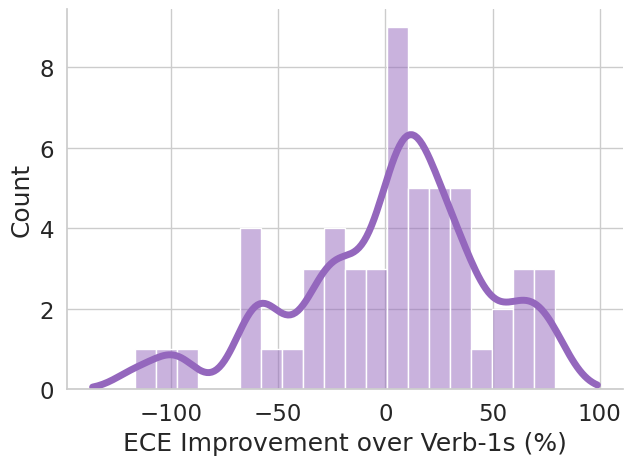

In [7]:
sns.set_theme(font_scale=1.5, style="whitegrid")

ref = plt_results[plt_results.method == "verb1s"]["ece_100"].values
new = plt_results[plt_results.method == "ct"]["ece_100"].values
# ref = plt_results[plt_results.method == "raw_13b_chat"]["ece_100"].values

g = sns.displot(pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
                # kind="kde", fill=True, bw_adjust=.5,
                kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
                height=5, aspect=4/3, legend=False,
                palette=sns.color_palette("tab20")[8:9])

g.ax.get_lines()[0].set(linewidth=5)

g.set(xlabel="ECE Improvement over Verb-1s (%)")

g.fig.tight_layout()
g.fig.show()
# g.fig.savefig("mmlu_rel_imp_qa_oe.pdf", bbox_inches="tight")

In [ ]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(100, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="ece_100", hue="method",
                 width=0.68,
                 hue_order=["ct", "verb1s"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
# ax.set_yticks(np.arange(0, 60 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "base": "Base", "ct": "CT", "verb1s": "Verb-1S" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_ece_comparison.pdf", bbox_inches="tight")

In [ ]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(100, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="acc_100", hue="method",
                 width=0.68,
                 hue_order=["ct", "verb1s"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "base": "Base", "ct": "CT", "verb1s": "Verb-1S" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_qacc_comparison.pdf", bbox_inches="tight")